# Combine DIC data with X-ray in order to calculate multiaxial flow curve

- Use pylab inline

In [1]:
pwd

u'/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/PSRD'

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


- Dependents

In [3]:
import os, time
from MP.mat import mech
from glob import glob
import RS
reload(RS)
from RS import sfig_class
reload(sfig_class)

from RS import analyze_proto,sff_plot
import matplotlib as mpl
from MP import progress_bar, lib
from MP import mat
mech=mat.mech

mpl_lib=lib.mpl_lib
uet=progress_bar.update_elapsed_time
GS=mpl.gridspec.GridSpec
fc=mat.mech.FlowCurve

- Name of DIC files

In [4]:
ls -l /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/DIC

total 411400
-rw-------  1 yj  admin  5452929 May 18 11:10 B_PS_RD-0005_0.mat
-rw-------  1 yj  admin  5452929 May 18 11:10 B_PS_RD-0006_0.mat
-rw-------  1 yj  admin  5452929 May 18 11:10 B_PS_RD-0007_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:10 B_PS_RD-0008_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:10 B_PS_RD-0009_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:16 B_PS_RD-0074_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:16 B_PS_RD-0075_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:17 B_PS_RD-0093_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:17 B_PS_RD-0094_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:18 B_PS_RD-0110_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:18 B_PS_RD-0111_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:18 B_PS_RD-0123_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:18 B_PS_RD-0124_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:19 B_PS_RD-0136_0.mat
-rw-------  1 yj  admin  3998797 May 18 11:19 B_PS_RD-0137_0.mat
-rw-------  

In [6]:
date='20120713'
path='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/'
fn_DIC=os.path.join(path,date,'DIC/DIC_results.txt')
dic_dat=np.loadtxt(fn_DIC,skiprows=1).T

# Read lab note book in order to match Xray file and DIC index

In [7]:
print os.popen('ls -l %s'%os.path.join(path,date,'Xray/*.tr')).read()

-rw-r--r--  1 yj  admin  461227 Jul 13  2012 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/Xray/13JUL12_0002.tr
-rw-r--r--  1 yj  admin  461227 Jul 13  2012 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/Xray/13JUL12_0005.tr
-rw-r--r--  1 yj  admin  461107 Jul 24  2012 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/Xray/13JUL12_0005_.tr
-rw-r--r--  1 yj  admin  461227 Jul 13  2012 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/Xray/13JUL12_0007.tr
-rw-r--r--  1 yj  admin  461047 Jul 13  2012 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/Xray/13JUL12_0014.tr
-rw-r--r--  1 yj  admin  461227 Jul 13  2012 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/Xray/13JUL12_0015.tr
-rw-r--r--  1 yj  admin  461863 Jul 13  2012 /Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/Xray/13JUL12_0016.tr
-rw-r--r--  1 yj  admin  461863 Jul 13  2012 /Users/yj/Documents/ExpDat/IFS

- Making a fref file for Proto data analysis

In [8]:
major_vij=2

# ------------------------------------------------------------------------
# Find suitable experimental stress factor file
fn_sff='/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSRD.sff'

# ------------------------------------------------------------------------
# Refer to Laboratory notebook to match up the X-ray data filename 
# and DIC image number
DIC_XRD="""#8  13JUL12_0016.tr
#74  13JUL12_0017.tr
#75  13JUL12_0017.tr
#93  13JUL12_0018.tr
#94  13JUL12_0018.tr
#110 13JUL12_0019.tr
#111 13JUL12_0019.tr
#123 13JUL12_0020.tr
#124 13JUL12_0020.tr
#136 13JUL12_0021.tr
#137 13JUL12_0021.tr
#148 13JUL12_0022.tr
#149 13JUL12_0022.tr
#163 13JUL12_0023.tr
#164 13JUL12_0023.tr
#175 13JUL12_0024.tr
#177 13JUL12_0024.tr
#188 13JUL12_0025.tr
#189 13JUL12_0025.tr
#201 13JUL12_0026.tr
#202 13JUL12_0026.tr
#211 13JUL12_0027.tr
#237 16JUL12_0006.tr
#238 16JUL12_0006.tr
#248 16JUL12_0007.tr
#249 16JUL12_0007.tr
#258 16JUL12_0008.tr
#259 16JUL12_0008.tr
#268 16JUL12_0009.tr
#269 16JUL12_0009.tr
#324 16JUL12_0010.tr
#325 16JUL12_0010.tr
#371 16JUL12_0011.tr
#372 16JUL12_0011.tr
#417 16JUL12_0012.tr
#418 16JUL12_0012.tr"""


"""#223 16JUL12_0003.tr
#227 16JUL12_0005.tr
#228 16JUL12_0005.tr"""

# ------------------------------------------------------------------------

'#223 16JUL12_0003.tr\n#227 16JUL12_0005.tr\n#228 16JUL12_0005.tr'

In [9]:
fn_fref=fn_DIC.split('DIC')[0]+'f_fref.txt'
f_fref=open(fn_fref,'w')
f_fref.write(fn_sff)
f_fref.write('  MajorStrainColumn: %i\n'%major_vij)
f_fref.write(('%14s'+'%12s '*4+' %5s'+'%12s '*4+' %14s\n')%(
        'filename','Exx','Eyy','Exy','Ezz','DIC','Exx_e','Eyye','SIG_a','SIG_e','Date'))

lines=DIC_XRD.split('\n')
inds = []; fns = []
## flow curve obj
myfc=fc()
Ex,Ey,Exy,Ez=[],[],[],[]

Ex_std =[]
Ey_std =[]
DIC_sigma_avg=[]; DIC_sigma_std=[]
for line in lines:
    ind,fn=line.split()
    ind=int(ind.split('#')[-1])
    fn = fn.split('.tr')[0]
    inds.append(ind); fns.append(fn)
    
    col = dic_dat[0]
    ix=np.where(col==ind)[0]
    i = int(col[ix][0]) ## dic index
    # print ix,i

    exx = dic_dat[5][ix]
    eyy = dic_dat[7][ix]
    exy = dic_dat[9][ix]
    ezz = -exx-eyy    
    
    # -----------------------------------------
    """ Additional elements..."""
    exx_std       = dic_dat[6][ix]
    eyy_std       = dic_dat[8][ix]
    DIC_sigma_a   = dic_dat[11][ix]
    DIC_sigma_e   = dic_dat[12][ix]
    # -----------------------------------------

    f_fref.write(('%14s '+'%+11.5e '*4+'%5i '+'%+11.5e '*4+' %14s\n')%(
            fn, exx, eyy, exy, ezz,i,exx_std,eyy_std,DIC_sigma_e,DIC_sigma_e,date))
    Ex.append(exx);Ey.append(eyy);Exy.append(exy);Ez.append(ezz)
    Ex_std.append(exx_std)
    Ey_std.append(eyy_std)
    DIC_sigma_avg.append(DIC_sigma_a)
    DIC_sigma_std.append(DIC_sigma_e)

myfc.get_strain(Ex,0,0)
myfc.get_strain(Ey,1,1)
myfc.get_strain(Exy,0,1)
myfc.get_strain(Exy,1,0)
myfc.get_strain(Ez,2,2)
myfc.set_zero_epsilon_ij(2,1)
myfc.set_zero_epsilon_ij(0,2)
myfc.get_vm_strain()
myfc.get_vm_stress()

myfc.DIC_sigma_avg=DIC_sigma_avg
myfc.DIC_sigma_std=DIC_sigma_std
myfc.Ex_std=Ex_std
myfc.Ey_std=Ey_std

f_fref.close()
print '-'*50
print fn_fref, 'has been created:\n Use it for further stress analysis'
print '-'*50

--------------------------------------------------
/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/f_fref.txt has been created:
 Use it for further stress analysis
--------------------------------------------------


In [10]:
print os.popen('head -n 5 %s'%fn_fref).read()

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSRD.sff  MajorStrainColumn: 2
      filename         Exx          Eyy          Exy          Ezz    DIC       Exx_e         Eyye        SIG_a        SIG_e            Date
  13JUL12_0016 +2.49848e-04 -1.90693e-03 +2.13088e-04 +1.65708e-03     8 +2.47418e-03 +1.54081e-03 +1.14803e-02 +1.14803e-02        20120713
  13JUL12_0017 +9.33486e-03 -1.94343e-03 +2.36687e-04 -7.39143e-03    74 +2.47129e-03 +1.72298e-03 +1.17078e-02 +1.17078e-02        20120713
  13JUL12_0017 +9.16382e-03 -1.74568e-03 +2.54199e-04 -7.41814e-03    75 +3.04226e-03 +1.56403e-03 +1.19086e-02 +1.19086e-02        20120713



# Running analyze_proto.main for the X-ray and DIC experiments

+ Determine representative strain levels for stress determination

In [11]:
#sff_plot.'/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSRD.sff'
eps_sff=sff_plot.readeps(fn=fn_sff,lb='\n')
print eps_sff
fc_sff=fc()


# for PSRD, E1=eps_sff
e11=np.array(eps_sff)
e22=np.zeros((len(e11),))
e33=-e11
print e11,e22,e33

fc_sff.get_strain(e11,i=0,j=0)
fc_sff.get_strain(e22,i=1,j=1)
fc_sff.get_strain(e33,i=2,j=2)
fc_sff.set_zero_shear_strain()
fc_sff.get_vm_strain()
print fc_sff.epsilon_vm

[0.0, 0.165, 0.3]
[ 0.     0.165  0.3  ] [ 0.  0.  0.] [-0.    -0.165 -0.3  ]
[ 0.          0.19052559  0.34641016]


In [12]:
## plastic strain of the points where the X-ray d-spacing
## were meausured are important information that is utilized over the X ray analysis.
## If, fc or fn_str are not given, the below application
## bases on the strain given in the fref file -
## the two major strain components are used with assumption
## that the sample was in 'equi-biaxial' strain.

t0=time.time()
RS=analyze_proto.main(
    path=os.path.join(path,date,'Xray'),
    fn_sf=fn_sff,fref=fn_fref,fc=fc_sff,
    ind_plot=True)
uet(time.time()-t0);print

fc was given

#-----------------------------------------------------#
 Interpolate SF and IG for matching with D-spacings
epsilon_vm:
[ 0.0020728   0.00985054  0.00973145  0.0165497   0.01657306  0.02348165
  0.02328607  0.03004018  0.02997446  0.03634141  0.0363859   0.04273517
  0.04270882  0.04894974  0.04933061  0.05572776  0.05611333  0.06180451
  0.0621155   0.068295    0.06842516  0.07467735  0.08143501  0.08122763
  0.08795314  0.08802162  0.09371004  0.09398134  0.09984313  0.09981508
  0.18252985  0.18255839  0.27320982  0.27345141  0.41692458  0.41880673]
Strain reference at which sf was measured:
[ 0.          0.19052559  0.34641016]
  ** Phi angles of SF are different **
  ** Phi angles of IG are different **
#-----------------------------------------------------#
-----------------------------------
Standard deviation in d_ehkl at istp=0

phi:     -90        0       45      135  avg
std: 5.9e-05  1.5e-04  9.1e-05  1.1e-04  1.0e-04 
Elapsed time:  51 [sec]


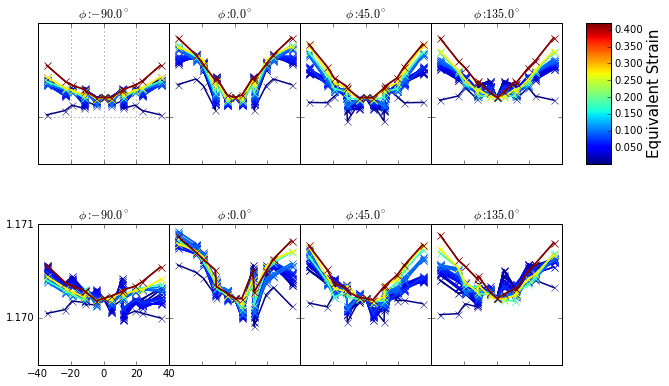

In [13]:
# print RS.EXP.ehkl.shape
#print RS.EXP.nphi, RS.EXP.npsi
RS.EXP.plot_all()

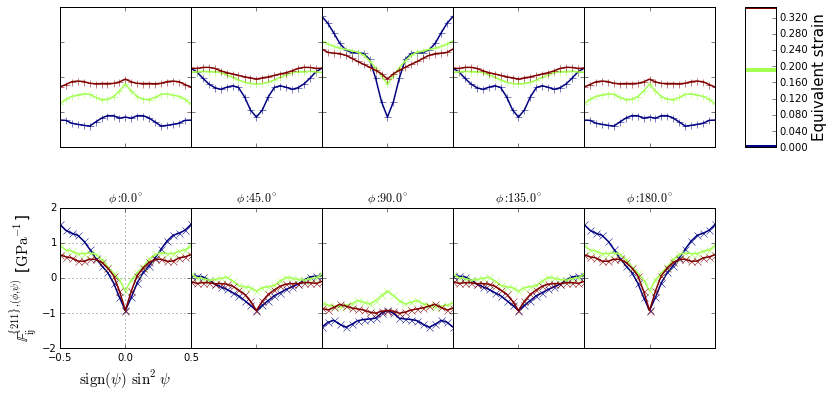

In [14]:
RS.SF_orig.plot()

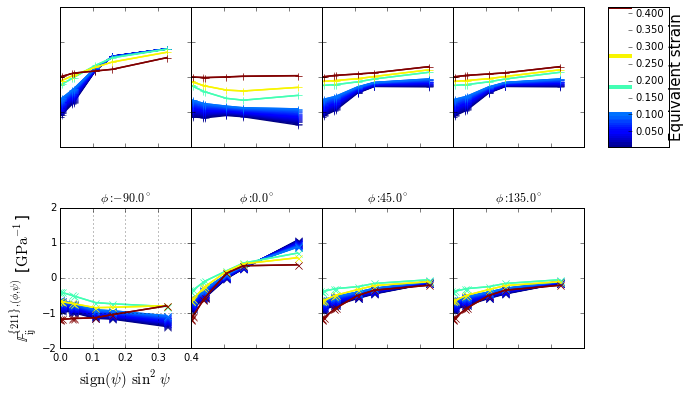

In [15]:
RS.SF.plot()
fig=plt.gcf()
for ax in fig.axes:
    ax.set_xlim(0.,0.4)

4
14
36
(36, 4, 14, 6)


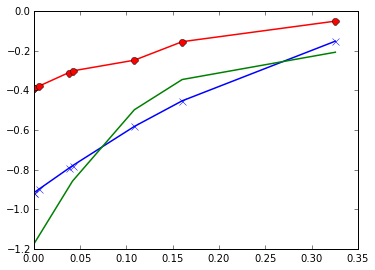

In [16]:
print len(RS.SF.phi)
print len(RS.SF.psi)
print RS.SF.nstp
print RS.SF.sf.shape
ft=RS.SF.psi>=0
x=RS.SF.psi[ft]
x=np.sin(x*np.pi/180.)**2
plot(x,RS.SF.sf[0,2,:,0][ft]*1e12,'-x')
#plot(x,RS.SF.sf[2,2,:,0][ft]*1e12,'-+')
plot(x,RS.SF.sf[-2,2,:,0][ft]*1e12,'-')
plot(x,RS.SF.sf[-5,2,:,0][ft]*1e12,'-o')

In [17]:
print fn_sff

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/IF_PSRD.sff


In [18]:
help(sff_plot.f1122)

Help on function f1122 in module RS.sff_plot:

f1122(fn='debug.sff', ifig=1, iphi=0, i=1, j=1, ilab=True, title='EVPSC', ls='-', ieps=None)
    Arguments
    fn   = 'debug.sff'
    ifig = 1
    iphi = 1
    i    = 1 (starts from 1)
    j    = 1 (starts from 1)
    ilab = True
    ls   = '-'



23
#phivalues	5																											
nphi: 5
23
#phivalues	5																											
nphi: 5


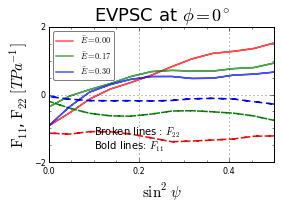

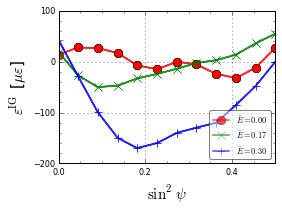

In [19]:
sff_plot.f1122(fn=fn_sff,i=1,j=1,iphi=0,ifig=0)
#sff_plot.f1122(fn=fn_sff,i=1,j=1,iphi=1,ifig=4)
#sff_plot.f1122(fn=fn_sff,i=1,j=1,iphi=2,ifig=8)
#sff_plot.f1122(fn=fn_sff,i=1,j=1,iphi=3,ifig=12)

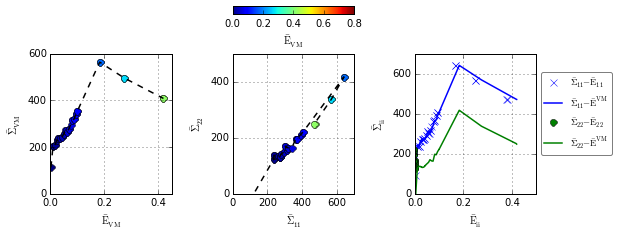

In [20]:
""" 
RS.EXP.flow.epsilon, RS.flow.sigma
"""
mn=0;mx=0.8
norm = mpl.colors.Normalize(vmin=mn,vmax=mx)
cmap, m = mpl_lib.norm_cmap(mn=mn,mx=mx)

fx=9
fy=fx*0.35
fig=plt.figure(figsize=(fx,fy))
gs=GS(20,3,wspace=0.5)
ax1=fig.add_subplot(gs[5:,0])
ax2=fig.add_subplot(gs[5:,1])
ax3=fig.add_subplot(gs[5:,2])

nstp = RS.EXP.flow.nstp


for istp in xrange(nstp):
    c=m.to_rgba(RS.EXP.flow.epsilon_vm[istp])
    ax2.plot(RS.flow.sigma[0,0][istp],RS.flow.sigma[1,1][istp],
             'o',mec='k',mfc=c)
    ax1.plot(RS.EXP.flow.epsilon_vm[istp],RS.flow.sigma_vm[istp],'o',c=c)

ax2.plot(RS.flow.sigma[0,0],RS.flow.sigma[1,1],'k--')
ax1.plot(RS.EXP.flow.epsilon_vm,RS.flow.sigma_vm,'k--')

l,=ax3.plot(RS.EXP.flow.epsilon[0,0],RS.flow.sigma[0,0],'x',label=r'$\mathrm{\bar{\Sigma}_{11} - \bar{E}_{11}}$')
ax3.plot(RS.EXP.flow.epsilon_vm,RS.flow.sigma[0,0],'-',color=l.get_color(),label=r'$\mathrm{\bar{\Sigma}_{11} - \bar{E}^{VM}}$')


l,=ax3.plot(RS.EXP.flow.epsilon[1,1],RS.flow.sigma[1,1],'o',label=r'$\mathrm{\bar{\Sigma}_{22} - \bar{E}_{22}}$')
ax3.plot(RS.EXP.flow.epsilon_vm,RS.flow.sigma[1,1],'-',color=l.get_color(),label=r'$\mathrm{\bar{\Sigma}_{22} - \bar{E}^{VM}}$')



for ax in fig.axes:
    ax.set_ylim(0.,);ax.set_xlim(0.,)
    ax.locator_params(nbins=4)
    ax.grid()

ax2.set_xlabel(r'$\mathrm{\bar{\Sigma}_{11}}$')
ax2.set_ylabel(r'$\mathrm{\bar{\Sigma}_{22}}$')
ax3.set_xlabel(r'$\mathrm{\bar{E}_{ii}}$')
ax3.set_ylabel(r'$\mathrm{\bar{\Sigma}_{ii}}$')
ax1.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
ax1.set_ylabel(r'$\mathrm{\bar{\Sigma}_{VM}}$')
ax3.legend(loc='best',fontsize=9,numpoints=1,bbox_to_anchor=(1,0.9))


axcb=fig.add_subplot(gs[0,1])
cb=mpl.colorbar.ColorbarBase(axcb,cmap=cmap,orientation='horizontal',
                          norm=norm,filled=True,format='%3.1f')
# axcb.locator_params(nbins=4)
axcb.set_xlabel(r'$\mathrm{\bar{E}_{VM}}$')
cb.set_ticks(np.linspace(mn,mx,5))
#mpl_lib.add_cb(ax=axcb,cmap=cmap, filled=True,
#               format='%5.3f',norm=norm,
#               ylab=r'$\mathrm{\bar{E}_{VM}}$')



- Pickle the object 'RS' and save to a file

In [21]:
import cPickle as pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

fn = os.path.join(path,date,'RS.pck')
print fn
save_object(obj=RS, filename=fn)

fn = os.path.join('../../../pickles/RS_%s.pck'%date)
print os.path.join(os.getcwd(),fn)
save_object(obj=RS, filename=fn)


fn = os.path.join('../../../pickles/RS_DIC_%s.pck'%date)
print os.path.join(os.getcwd(),fn)
save_object(obj=myfc, filename=fn)

/Users/yj/Documents/ExpDat/IFSteel/Marciniak-X-ray-IF/PS/20120713/RS.pck
/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/PSRD/../../../pickles/RS_20120713.pck
/Users/yj/repo/FLD_DIC_XRAY/tutorials/XRD_analysis/IF_steel/PSRD/../../../pickles/RS_DIC_20120713.pck
